In [108]:
import pandas as pd

In [109]:
df=pd.read_csv("haberman.csv",header=None)
df.columns=['age','operation_at_age','number_auxilary_nodes','survival_status']
df.shape

(306, 4)

In [110]:
df.columns

Index(['age', 'operation_at_age', 'number_auxilary_nodes', 'survival_status'], dtype='object')

In [111]:
print("Number of points is %d" %(df.shape[0]))

Number of points is 306


In [112]:
print("Number of features is %d" %(df.shape[1]-1))

Number of features is 3


In [113]:
len(df['survival_status'].unique())

2

In [114]:
print("Number of different types of classes are %d"%(len(df['survival_status'].unique())))
print("which are")
print(df['survival_status'].unique())

Number of different types of classes are 2
which are
[1 2]


In [115]:
#chnage level 2 to 0
def change_2_to_0(x):
    if x==2:
        return 0
    else:
        return 1
#print(df['survival_status'][7])
df['survival_status']=df['survival_status'].apply(change_2_to_0)
#print(df['survival_status'][7])

In [116]:
df['survival_status'].value_counts()

1    225
0     81
Name: survival_status, dtype: int64

In [117]:
print("This is a imbalance data set as the ratio of positive to negative points is %d : %d" %(len(df[df['survival_status']==1]),len(df[df['survival_status']==0])))

This is a imbalance data set as the ratio of positive to negative points is 225 : 81


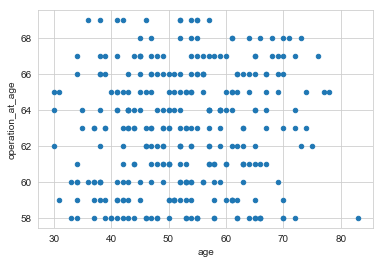

In [118]:
import matplotlib.pyplot as plt
df.plot.scatter(x='age',y='operation_at_age')
plt.show()

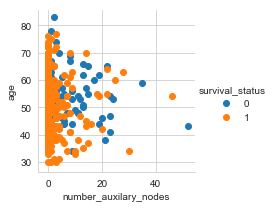

In [120]:
import seaborn as sns
sns.set_style("whitegrid")
sns.FacetGrid(df,hue='survival_status').map(plt.scatter,'number_auxilary_nodes','age').add_legend()
plt.show()

In [121]:
## 3d Scatter plot

In [122]:
import plotly as py
import plotly.graph_objs as go
py.offline.init_notebook_mode(connected=True)

In [123]:
trace1 = go.Scatter3d(
    x=df['age'],
    y=df['operation_at_age'],
    z=df['number_auxilary_nodes'],
    mode='markers',
    marker=dict(
        size=12,
        color=df['survival_status'],                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)

data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig, filename='3d-scatter-colorscale')

In [126]:
df.columns

Index(['age', 'operation_at_age', 'number_auxilary_nodes', 'survival_status'], dtype='object')

In [148]:
#pair plots

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning:

invalid value encountered in true_divide

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning:

invalid value encountered in double_scalars

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning:

invalid value encountered in reduce



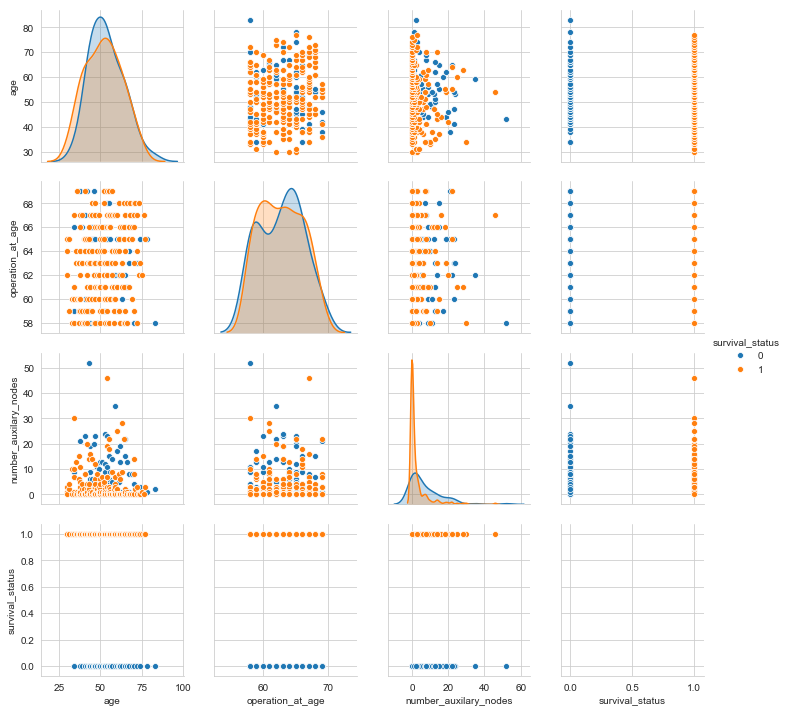

In [149]:
sns.pairplot(df,hue='survival_status')

In [150]:
print("From 3d scatter plot and pair plot i assume that this data set is inseparable. Lets see what happens")

From 3d scatter plot and pair plot i assume that this data set is inseparable. Lets see what happens


In [158]:
# PDF of sll 3 featured

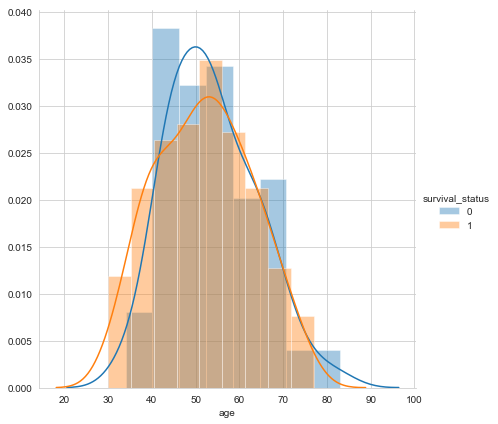

In [159]:
sns.FacetGrid(df,hue='survival_status',height=6).map(sns.distplot,'age').add_legend()

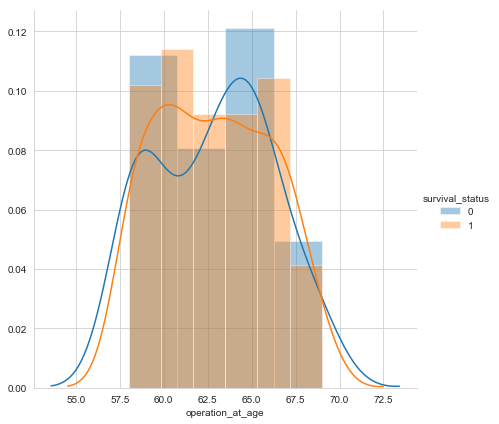

In [160]:
sns.FacetGrid(df,hue='survival_status',height=6).map(sns.distplot,'operation_at_age').add_legend()

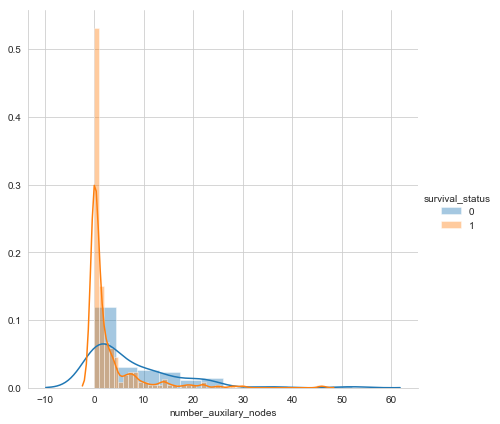

In [161]:
sns.FacetGrid(df,hue='survival_status',height=6).map(sns.distplot,'number_auxilary_nodes').add_legend()

In [195]:
#plotting pdf and cdf

[0.20588235 0.29738562 0.38235294 0.45751634 0.55555556 0.65686275
 0.74836601 0.83986928 0.92156863 1.        ]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


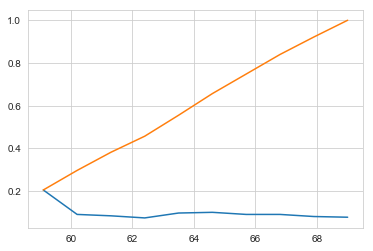

In [200]:
import numpy as np
count,bin_edges=np.histogram(df['operation_at_age'],density=True,bins=10)
pdf=count/sum(count)
#print(pdf)
cdf=np.cumsum(pdf)
print(cdf)
print(bin_edges)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

[0.05228758 0.14052288 0.29084967 0.46405229 0.64379085 0.77777778
 0.91176471 0.97058824 0.99346405 1.        ]
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]


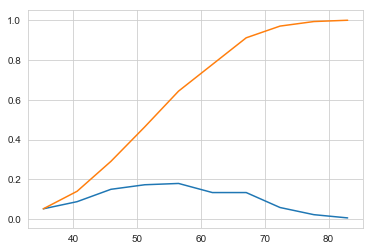

In [201]:
import numpy as np
count,bin_edges=np.histogram(df['age'],density=True,bins=10)
pdf=count/sum(count)
#print(pdf)
cdf=np.cumsum(pdf)
print(cdf)
print(bin_edges)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

[0.77124183 0.86928105 0.92810458 0.95424837 0.98366013 0.99019608
 0.99346405 0.99346405 0.99673203 1.        ]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


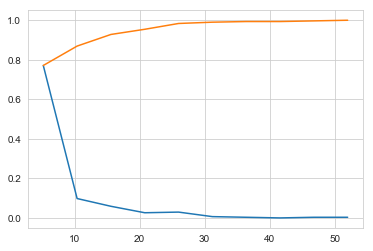

In [202]:
import numpy as np
count,bin_edges=np.histogram(df['number_auxilary_nodes'],density=True,bins=10)
pdf=count/sum(count)
#print(pdf)
cdf=np.cumsum(pdf)
print(cdf)
print(bin_edges)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

In [203]:
df.columns

Index(['age', 'operation_at_age', 'number_auxilary_nodes', 'survival_status'], dtype='object')

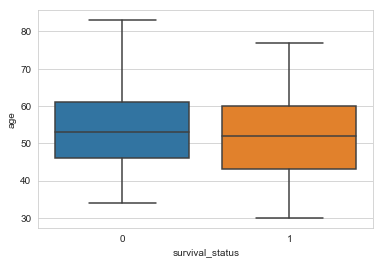

In [204]:
sns.boxplot(data=df,x='survival_status',y='age')

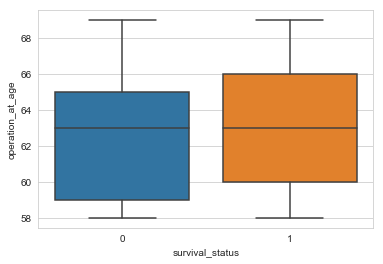

In [205]:
sns.boxplot(data=df,x='survival_status',y='operation_at_age')

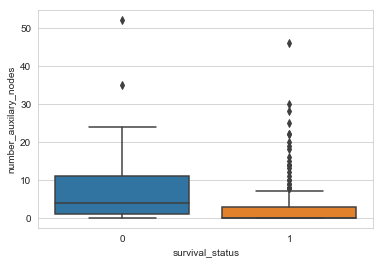

In [206]:
sns.boxplot(data=df,x='survival_status',y='number_auxilary_nodes')

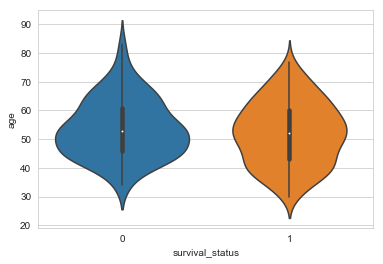

In [210]:
sns.violinplot(data=df,x='survival_status',y='age')

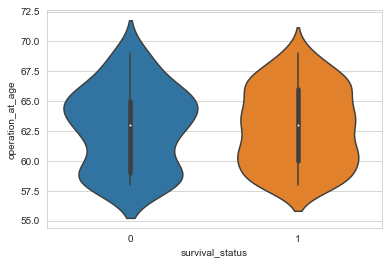

In [211]:
sns.violinplot(data=df,x='survival_status',y='operation_at_age')

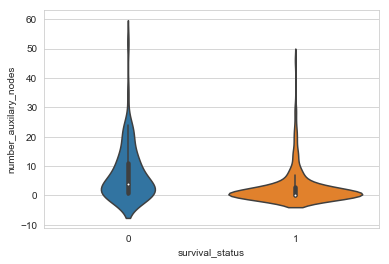

In [212]:
sns.violinplot(data=df,x='survival_status',y='number_auxilary_nodes')